<a href="https://colab.research.google.com/github/riseoptions/Puzzles/blob/main/Wordle_comb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving lemmad.txt to lemmad.txt


In [2]:
# Faili lugemine
file_name = list(uploaded.keys())[0]  # Võtab üleslaaditud faili nime
with open(file_name, 'r', encoding='utf-8') as file:
    words = file.readlines()


In [3]:
# Loeme sõnad failist ja rakendame filtreerimise
with open('lemmad.txt', 'r', encoding='utf-8') as file:
    words = file.readlines()

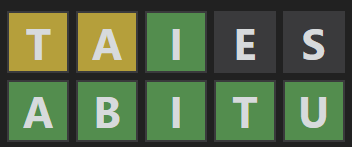

In [31]:
# Funktsioon sõnade filtreerimiseks
def filter_words(word):
    required_letters = set('tai')
    forbidden_letters = set('es')

    # Kontrollime, et sõna on täpselt N tähemärki pikk
    if len(word) != 5:
        return False

    # Kontrollime, et sõna sisaldab vajalikke tähti ja ei sisalda keelatud tähti
    if not (required_letters.issubset(set(word)) and not forbidden_letters.intersection(set(word))):
        return False

    # Täiendavad positsioonitingimused
    if word[0] == 't' or word[1] == 'a' \
       or word[2] != 'i'  :
        return False

    return True

In [32]:
# Filtreerime ja trükime tulemused
filtered_words = [word.strip() for word in words if filter_words(word.strip())]

In [33]:
# Trükime sobivad sõnad
for word in filtered_words:
    print(word)

abitu


**Mitmes sõnas vastavad tähed esinevad:**

In [25]:
from collections import defaultdict

def count_words_with_letters(filename):
    # Loome dictionary, kus võtmed on tähed a kuni z ja väärtused on loendurid
    letter_count = defaultdict(int)

    # Loeme faili ridade kaupa
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            word = line.strip().lower()  # Eemaldame tühikud ja teisendame sõna väikesteks tähtedeks

            # Läbime kõik tähed a kuni z ja kontrollime, kas täht on sõnas
            for letter in 'abcdefghijklmnopqrstuvwxyzõäöü':
                if letter in word:
                    letter_count[letter] += 1

    return dict(letter_count)

def sort_by_value_desc(dictionary):
    # Sorteerime dictionary võtmed väärtuse järgi, suurimast väiksemaks
    return sorted(dictionary.items(), key=lambda item: item[1], reverse=True)

# Näide kasutamisest:
filename = 'lemmad.txt'
letter_dict = count_words_with_letters(filename)
sorted_letter_count = sort_by_value_desc(letter_dict)

# Väljasta tulemused
for letter, count in sorted_letter_count:
    print(f"{letter}: {count}")



a: 71636
i: 64673
e: 58306
s: 57755
t: 52807
l: 49658
u: 47253
k: 46369
r: 46276
n: 42340
m: 38524
o: 29726
p: 26629
v: 24222
d: 22997
h: 18454
g: 15906
õ: 12180
j: 12020
ä: 11355
ü: 8754
b: 8512
f: 3252
ö: 3101
c: 95
z: 49
y: 25
x: 13
w: 10
q: 8


**Mitmes sõnas antud listist vastavad tähed esinevad:**

In [28]:
def count_consecutive_words_with_letters(words):
    letter_streaks = {}  # Sõnastik, kuhu salvestame tähed ja nende järjestikuste sõnade arvu
    current_streak = {}  # Praeguse järjestikuse sõna jälgimine

    for word in words:
        word_letters = set(word)  # Eemaldame korduvad tähed ja teeme sõnast hulga

        # Uuendame streaki iga tähe kohta
        for letter in 'abcdefghijklmnopqrstuvwxyzõäöü':
            if letter in word_letters:
                # Kui täht on sõnas, jätkame tema streaki
                current_streak[letter] = current_streak.get(letter, 0) + 1
            else:
                # Kui täht ei esine, lähtestame streaki
                letter_streaks[letter] = max(letter_streaks.get(letter, 0), current_streak.get(letter, 0))
                current_streak[letter] = 0

    # Peale viimast sõna tuleb uuendada lõplikud streaki väärtused
    for letter in 'abcdefghijklmnopqrstuvwxyzõäöü':
        letter_streaks[letter] = max(letter_streaks.get(letter, 0), current_streak.get(letter, 0))

    # Sorteerime tähtede järgi, mitu sõna nad järjestikuliselt esinesid
    sorted_letters = sorted(letter_streaks.items(), key=lambda item: item[1], reverse=True)

    return sorted_letters

# Näide sõnadest:
words = [
    "duett", "edutu", "efekt", "ehtne", "elutu", "ettur", "etüüd", "etüül", "etüün",
    "forte", "hekto", "hetke", "joote", "juhte", "jätke", "kätte", "kütke", "kütte",
    "lento", "loetu", "lähte", "mõõte", "neetu", "nõtke", "pette", "pleht", "plett",
    "porte", "puhte", "puute", "retro", "rettu", "unetu", "uuelt", "veetu", "verte",
    "ühtne"
]

# Kasutame filtreeritud sõnu
words = filtered_words

# Leiame tähemärkide pingerea
result = count_consecutive_words_with_letters(words)

# Väljasta tulemused
for letter, count in result:
    print(f"{letter}: {count}")



d: 1
e: 1
t: 1
u: 1
a: 0
b: 0
c: 0
f: 0
g: 0
h: 0
i: 0
j: 0
k: 0
l: 0
m: 0
n: 0
o: 0
p: 0
q: 0
r: 0
s: 0
v: 0
w: 0
x: 0
y: 0
z: 0
õ: 0
ä: 0
ö: 0
ü: 0


**Genereerime sobivaid sõnu:**

In [30]:
# Funktsioon sõnade filtreerimiseks
def filter_words(word):
    required_letters = set('detu')
    forbidden_letters = set('')

    # Kontrollime, et sõna on täpselt 5 tähemärki pikk
    if len(word) != 5:
        return False

    # Kontrollime, et sõna sisaldab vajalikke tähti ja ei sisalda keelatud tähti
    if not (required_letters.issubset(set(word)) and not forbidden_letters.intersection(set(word))):
        return False

   # Täiendavad positsioonitingimused
    if word[0] == 'r' or word[1] == 'r' \
       or word[2] == 'o' or word[4] == 'a' :
        return False

    return True

# Loeme sõnad failist ja rakendame filtreerimise
with open('lemmad.txt', 'r', encoding='utf-8') as file:
    words = file.readlines()

# Filtreerime ja trükime tulemused
filtered_words = [word.strip() for word in words if filter_words(word.strip())]

# Trükime sobivad sõnad
for word in filtered_words:
    print(word)




duett
edutu
teadu
tuder
